In [35]:
# SCRAPING HOUSING DATA FROM THE REALTOR WEBSITE
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = 'https://www.realtor.com/realestateandhomes-search/San-Francisco_CA'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the page content
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract data
listings = []
for listing in soup.find_all('div', class_='CardContent__StyledCardContent-rui__sc-7ptz1z-0 kDqsxy card-content card-content'):
    price = listing.find('div', class_='Pricestyles__StyledPrice-rui__btk3ge-0 kjbIiZ card-price')
    house_type = listing.find('div', class_='base__StyledType-rui__sc-108xfm0-0 hRTvWe message')
    # details = listing.find('ul', class_='PropertyMetastyles__StyledPropertyMeta-rui__sc-1g5rdjn-0 iQEvdK card-meta')
    bed = listing.find('li', class_='PropertyBedMetastyles__StyledPropertyBedMeta-rui__a4nnof-0 jkAoUn')
    bath = listing.find('li', class_='PropertyBathMetastyles__StyledPropertyBathMeta-rui__sc-67m6bo-0 hGQdFx') 
    squareFeet = listing.find('li', class_='PropertySqftMetastyles__StyledPropertySqftMeta-rui__sc-1gdau7i-0 cYyTDO')
    address = listing.find('div', class_='card-address truncate-line')

    # Check if elements are found and extract text
    price_amount = price.text.strip() if price else 'N/A'
    house_type_text = house_type.text.strip().split()[0] if house_type else 'N/A'
    bed_text = bed.text.strip().split('bed')[0] if bed else 'N/A'
    bath_text = bath.text.strip().split('bath')[0] if bath else 'N/A'
    squareFeet_text = squareFeet.text.strip().split('sqft')[0] if squareFeet else 'N/A'
    address_text = address.text.strip() if address else 'N/A'

    # Append data to listings
    listings.append({
        'Price': price_amount,
        'House type': house_type_text,
        'Number of bedrooms': bed_text,
        'Number of bathrooms': bath_text,
        'Square Feet': squareFeet_text,
        'Property Address': address_text
    })

# Print the listings to debug
print(listings)

# Create a DataFrame
df = pd.DataFrame(listings)

# Save DataFrame to Excel
df.to_excel('housing_data.xlsx', index=False)

# Clean the 'Price' column to convert the 'Price' column from a string to a numeric format by removing the currency ($) symbol and commas
def clean_price(price):
    if isinstance(price, str):
        price = price.replace('$', '').replace(',', '')
        try:
            return float(price)
        except ValueError:
            return None
    return None

df['Price'] = df['Price'].apply(clean_price)

# Drop rows with None values in the 'Price' column to remove rows where the 'Price' column couldn't be converted to a numeric value.
df = df.dropna(subset=['Price'])

[{'Price': '$168,000', 'House type': 'Condo', 'Number of bedrooms': '2', 'Number of bathrooms': '2', 'Square Feet': '1,141', 'Property Address': '900 N Point 34J St Unit CbSan Francisco, CA 94109'}, {'Price': '$351,888', 'House type': 'Condo', 'Number of bedrooms': '2', 'Number of bathrooms': '2', 'Square Feet': '1,089', 'Property Address': '74 New Montgomery St Unit 317San Francisco, CA 94105'}, {'Price': '$795,000', 'House type': 'House', 'Number of bedrooms': 'Studio', 'Number of bathrooms': '1', 'Square Feet': '1,210', 'Property Address': '140 Allison StSan Francisco, CA 94112'}, {'Price': '$1,399,000', 'House type': 'House', 'Number of bedrooms': '4', 'Number of bathrooms': '3.5', 'Square Feet': '2,129', 'Property Address': '1922 31st AveSan Francisco, CA 94116'}, {'Price': '$1,349,000', 'House type': 'House', 'Number of bedrooms': '2', 'Number of bathrooms': '1', 'Square Feet': 'N/A', 'Property Address': '1870 44th AveSan Francisco, CA 94122'}, {'Price': '$2,695,000', 'House type

In [33]:
# Descriptive analysis
df.describe()

,Price
count,8.000000e+00
mean,1.416486e+06
std,1.305596e+06
min,1.680000e+05
25%,5.372220e+05
50%,1.072000e+06
75%,1.723000e+06
max,3.975000e+06


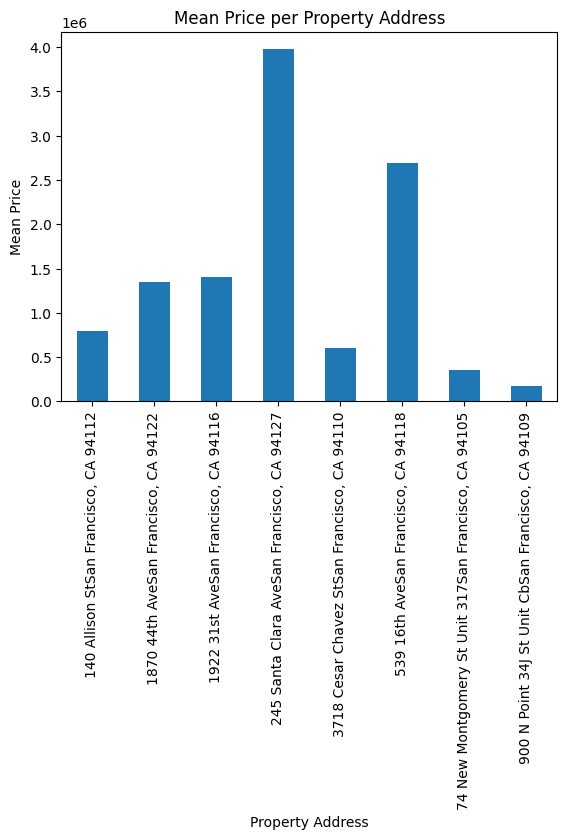

In [36]:
# Diagnostic analysis to identify patterns and anomalies.
df.groupby('Property Address')['Price'].mean().plot(kind='bar')
plt.xlabel('Property Address')
plt.ylabel('Mean Price')
plt.title('Mean Price per Property Address')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [38]:
print(df.head())
print(df.describe())

       Price House type Number of bedrooms Number of bathrooms Square Feet  \
0   168000.0      Condo                  2                   2       1,141   
1   351888.0      Condo                  2                   2       1,089   
2   795000.0      House             Studio                   1       1,210   
3  1399000.0      House                  4                 3.5       2,129   
4  1349000.0      House                  2                   1         N/A   

                                    Property Address  
0  900 N Point 34J St Unit CbSan Francisco, CA 94109  
1  74 New Montgomery St Unit 317San Francisco, CA...  
2              140 Allison StSan Francisco, CA 94112  
3               1922 31st AveSan Francisco, CA 94116  
4               1870 44th AveSan Francisco, CA 94122  
              Price
count  8.000000e+00
mean   1.416486e+06
std    1.305596e+06
min    1.680000e+05
25%    5.372220e+05
50%    1.072000e+06
75%    1.723000e+06
max    3.975000e+06


In [40]:
# Calculate and print quantiles
quantile_25 = df['Price'].quantile(0.25)
print(f"25th percentile value: {quantile_25}")

# Perform prescriptive analysis to recommend investment opportunities.
recommendations = df[df['Price'] < quantile_25]

# Print the filtered recommendations
print(recommendations)

25th percentile value: 537222.0
      Price House type Number of bedrooms Number of bathrooms Square Feet  \
0  168000.0      Condo                  2                   2       1,141   
1  351888.0      Condo                  2                   2       1,089   

                                    Property Address  
0  900 N Point 34J St Unit CbSan Francisco, CA 94109  
1  74 New Montgomery St Unit 317San Francisco, CA...  


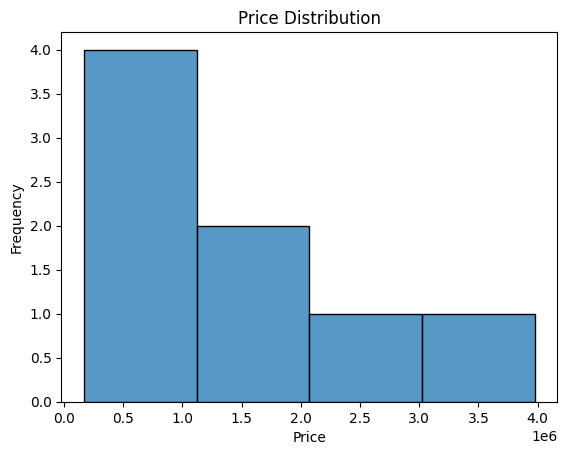

In [41]:
# DATA VISUALIZATION OF THE HOUSING DATA

# Price distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [44]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import plotly
print(plotly.__version__)

5.23.0


In [47]:
print(df.head())
print(df[['latitude', 'longitude']].describe())

   latitude  longitude    price
0   37.7749  -122.4194  1000000
1   37.8049  -122.2711   800000
        latitude   longitude
count   2.000000    2.000000
mean   37.789900 -122.345250
std     0.021213    0.104864
min    37.774900 -122.419400
25%    37.782400 -122.382325
50%    37.789900 -122.345250
75%    37.797400 -122.308175
max    37.804900 -122.271100


In [50]:
# DATA VISUALIZATION OF THE HOUSING DATA

# Geographical distribution using the 'plotly' module
import plotly.express as px
import pandas as pd

# Sample data
df = pd.DataFrame({
    'latitude': [37.7749, 37.8049],
    'longitude': [-122.4194, -122.2711],
    'price': [1000000, 800000]
})

# Create a scatter mapbox plot
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='price', size='price',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox=dict(center=dict(lat=df['latitude'].mean(), lon=df['longitude'].mean()), zoom=10))
fig.show()